import sys
from zipfile import PyZipFile
#for zip_file in sys.argv[1:]:
zip_file = "vgsales1.csv.zip"
pzf = PyZipFile(zip_file)
pzf.extractall()

## 1.Importing all the necessary libraries

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
from matplotlib.pyplot import suptitle
import os


import sklearn
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew 

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

##  2.Obtaining Data

In [2]:
vgs = pd.read_csv('vgsales1.csv')
vgs.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
vgs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## 3. Data Fetching: Cleaning, and Processing

### 3.1 Data Cleaning

In [4]:
! which python

/home/bat/anaconda3/bin/python


In [5]:
# Finding all the columns containing NA values
vgs.columns[vgs.isna().any()].tolist()

['Name',
 'Year_of_Release',
 'Genre',
 'Publisher',
 'Critic_Score',
 'Critic_Count',
 'User_Score',
 'User_Count',
 'Developer',
 'Rating']

In [6]:
# replacing NA values in Year of Release column with the current year 
vgs["Year_of_Release"].fillna(2018, inplace = True) 

# replacing NA values in Genre column with MISC
vgs["Genre"].fillna("Misc", inplace = True)

# replacing NA values in Publisher column with MISC
vgs["Publisher"].fillna("Misc", inplace = True)

#### Changing the column datatypes

In [7]:
#changing the Year of Release Column datatype to Integer
vgs = vgs.astype({ "Year_of_Release": int})

#### Deleting the unnecesary columns

In [8]:
#deleting the column 'Other Sales' from the dataset as we not analyzing other regions apart from Europe, North America and Japan
vgs = vgs.drop(['Other_Sales'], axis=1)

In [9]:
vgs.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,31.37,NaN,NaN,NaN,NaN,NaN,NaN


# 4. Visualizing: The Video Game Sales Analysis

## Current: Looking At Trends 2005 Onwards 

In [10]:
vgs_2000 = vgs[ vgs["Year_of_Release"] >= 2005]
top_genre_global = vgs_2000.groupby('Genre').agg({'Global_Sales':np.sum}).sort_values(['Global_Sales'], ascending=[False])
top_genre_na = vgs_2000.groupby('Genre').agg({'NA_Sales':np.sum}).sort_values(['NA_Sales'], ascending=[False])
top_genre_eu = vgs_2000.groupby('Genre').agg({'EU_Sales':np.sum}).sort_values(['EU_Sales'], ascending=[False])
top_genre_jp = vgs_2000.groupby('Genre').agg({'JP_Sales':np.sum}).sort_values(['JP_Sales'], ascending=[False])

In [11]:
vgs_2000['Platform'].value_counts()

DS      2128
PS3     1331
Wii     1320
X360    1262
PSP     1194
PS2     1099
PC       830
3DS      520
PSV      432
PS4      393
XB       266
XOne     247
GBA      191
GC       155
WiiU     147
2600      17
PS         7
N64        3
DC         2
GB         1
Name: Platform, dtype: int64

### Sales Comparison by "Genre" for Each Region

In [12]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go


init_notebook_mode(connected=True)

trace = go.Bar(
                x = top_genre_global.index,
                y =top_genre_global['Global_Sales'].tolist(),
                name = 'Video game Genre in order of sales Count',
    marker={'color': top_genre_global['Global_Sales'].tolist(),
        'colorscale': 'Viridis'

           }
               )


data = [trace]
layout = go.Layout(title='Video game Genre in order of sales Count in Global',
                  xaxis = dict(
                          title = 'Genre',
                            titlefont = dict(
                                        family = 'Courier New, monospace',
                                        size = 18,
                                        color = '#0000FF'
                                            )
                  
                              ),
                   yaxis = dict(
                          title = 'Sales Count',
                            titlefont = dict(
                                        family = 'Courier New, monospace',
                                        size = 18,
                                        color = '#0000FF'
                                        )
                               )                  
                  )

fig = go.Figure(data=data,layout=layout)
config={'showLink': False}
iplot(fig,filename='grouped bar',config=config)

In [13]:
fig = {
  "data": [
    {
      "values": top_genre_na['NA_Sales'].tolist(),
      "labels": top_genre_na.index,
      "domain": {"x": [0, .30],'y': [0, 1]},
      "name": "NA",
      "hoverinfo":"label+percent+name",
      "textinfo":'value', 
      "textposition":"inside",
      "hole": .3,
      "type": "pie"
    },
    {
      "values": top_genre_eu['EU_Sales'].tolist(),
      "labels": top_genre_eu.index,
      "textposition":"inside",
      "domain": {"x": [.36, 0.66],'y': [0, 1]},
      "name": "EU",
      "hoverinfo":"label+percent+name",
        "textinfo":'value',
      "hole": .3,
      "type": "pie"
    },
    {
      "values": top_genre_jp['JP_Sales'].tolist(),
      "labels": top_genre_jp.index,
      "textposition":"inside",
      "domain": {"x": [.70, 1],'y': [0, 1]},
      "name": "JP",
      "hoverinfo":"label+percent+name",
        "textinfo":'value',
      "hole": .3,
      "type": "pie"
    }
  
  
  
  ],
  "layout": {
        "title":"Top Genre in Each Region",'titlefont':{'size' : 30,'color' : '#4292f4'},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "NA",
                "x": 0.13,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "EU",
                "x": 0.51,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "JP",
                "x": 0.87,
                "y": 0.5
            }
        ]
    ,"autosize": True}
}

 

config={'showLink': False}
iplot(fig, filename='donut',config=config)

#iplot(fig,filename='donut group',config=config, image_width=1000, image_height=2000)

## Top Titles

In [14]:
labels = vgs_2000['Name'].value_counts()[:10].index
values = vgs_2000['Name'].value_counts()[:10].values

In [15]:
title_na = vgs.sort_values(['NA_Sales'], ascending=[False])[['Name','NA_Sales']][:10]
title_eu = vgs.sort_values(['EU_Sales'], ascending=[False])[['Name','EU_Sales']][:10]
title_jp = vgs.sort_values(['JP_Sales'], ascending=[False])[['Name','JP_Sales']][:10]

In [16]:
from plotly import tools

trace1 = go.Bar(
                x = title_na['Name'].tolist(),
                y = title_na['NA_Sales'].tolist(),
                name = 'NA',
    marker=dict(
        color='rgb(255,100,50)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        ))
               )

trace2 = go.Bar(
                x = title_eu['Name'].tolist(),
                y = title_eu['EU_Sales'].tolist(),
                name = 'EU',
    marker=dict(
        color='rgb(100,150,200)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        ))
               )
trace3 = go.Bar(
                x = title_jp['Name'].tolist(),
                y = title_jp['JP_Sales'].tolist(),
                name = 'JP',
    marker=dict(
        color='rgb(50,200,50)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        ))
               )
data = [trace1,trace2,trace3]
fig = tools.make_subplots(rows=3, cols=1, subplot_titles=('North America', 'Europe',
                                                          'Japan'), print_grid=False,shared_yaxes=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig['layout']['xaxis3'].update(title='Title of the Game',titlefont={'size' : 25,'color' : '#4292f4'})
fig['layout']['yaxis2'].update(title='Total Sales',titlefont={'size' : 25,'color' : '#4292f4'})
fig['layout'].update(title="TOP 10 TITLE SELL",titlefont={'size' : 30,'color' : '#4292f4'}, height=1200, width=900,margin=go.layout.Margin(
        l=100,
        r=100,
        b=200,
        t=100,
        pad=10
    ))
                     
config={'showLink': False}
iplot(fig,filename='grouped bar',config=config, image_width=800, image_height=700)

## Top Publisher

In [17]:
top_publisher_na = vgs_2000.groupby('Publisher').agg({'NA_Sales':np.sum}).sort_values(['NA_Sales'], ascending=[False]).head(10)
top_publisher_eu = vgs_2000.groupby('Publisher').agg({'EU_Sales':np.sum}).sort_values(['EU_Sales'], ascending=[False]).head(10)
top_publisher_jp = vgs_2000.groupby('Publisher').agg({'JP_Sales':np.sum}).sort_values(['JP_Sales'], ascending=[False]).head(10)

In [18]:
from plotly import tools

trace1 = go.Bar(
                x = top_publisher_na.index,
                y = top_publisher_na['NA_Sales'].tolist(),
                name = 'NA',
    marker=dict(
        color='rgb(50,170,120)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        ))
               )

trace2 = go.Bar(
                x = top_publisher_eu.index,
                y = top_publisher_eu['EU_Sales'].tolist(),
                name = 'EU',
    marker=dict(
        color='rgb(10,50,100)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        ))
               )
trace3 = go.Bar(
                x = top_publisher_jp.index,
                y = top_publisher_jp['JP_Sales'].tolist(),
                name = 'JP',
    marker=dict(
        color='rgb(170,20,100)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        ))
               )
data = [trace1,trace2,trace3]
fig = tools.make_subplots(rows=3, cols=1, subplot_titles=('North America', 'Europe',
                                                          'Japan'), print_grid=False,shared_yaxes=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig['layout']['xaxis3'].update(title='Publisher',titlefont={'size' : 25,'color' : '#4292f4'})
fig['layout']['yaxis2'].update(title='Total Sales',titlefont={'size' : 25,'color' : '#4292f4'})
fig['layout'].update(title="TOP 10 Pubishers based on Sell",titlefont={'size' : 30,'color' : '#4292f4'}, height=1200, width=900,margin=go.layout.Margin(
        l=100,
        r=100,
        b=200,
        t=100,
        pad=10
    ))
                     
config={'showLink': False}
iplot(fig,filename='grouped bar',config=config, image_width=800, image_height=700)

## Top Develpoers

In [19]:
top_developer_na = vgs_2000.groupby('Developer').agg({'NA_Sales':np.sum}).sort_values(['NA_Sales'], ascending=[False]).head(10)
top_developer_eu = vgs_2000.groupby('Developer').agg({'EU_Sales':np.sum}).sort_values(['EU_Sales'], ascending=[False]).head(10)
top_developer_jp = vgs_2000.groupby('Developer').agg({'JP_Sales':np.sum}).sort_values(['JP_Sales'], ascending=[False]).head(10)

In [20]:
from plotly import tools

trace1 = go.Bar(
                x = top_developer_na.index,
                y = top_developer_na['NA_Sales'].tolist(),
                name = 'NA',
    marker=dict(
        color='rgb(25,90,100)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        ))
               )

trace2 = go.Bar(
                x = top_developer_eu.index,
                y = top_developer_eu['EU_Sales'].tolist(),
                name = 'EU',
    marker=dict(
        color='rgb(10,138,170)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        ))
               )
trace3 = go.Bar(
                x = top_developer_jp.index,
                y = top_developer_jp['JP_Sales'].tolist(),
                name = 'JP',
    marker=dict(
        color='rgb(150,50,100)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        ))
               )
data = [trace1,trace2,trace3]
fig = tools.make_subplots(rows=3, cols=1, subplot_titles=('North America', 'Europe',
                                                          'Japan'), print_grid=False,shared_yaxes=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig['layout']['xaxis3'].update(title='Developer',titlefont={'size' : 25,'color' : '#4292f4'})
fig['layout']['yaxis2'].update(title='Total Sales',titlefont={'size' : 25,'color' : '#4292f4'})
fig['layout'].update(title="TOP 10 Developers based on Sell",titlefont={'size' : 30,'color' : '#4292f4'}, height=1200, width=900,margin=go.layout.Margin(
        l=100,
        r=100,
        b=200,
        t=100,
        pad=10
    ))
                     
config={'showLink': False}
iplot(fig,filename='grouped bar',config=config, image_width=800, image_height=700)

## Top Platform

In [21]:
platform_na = vgs_2000.groupby('Platform').agg({'NA_Sales':np.sum}).sort_values(['NA_Sales'], ascending=[False])
platform_eu = vgs_2000.groupby('Platform').agg({'EU_Sales':np.sum}).sort_values(['EU_Sales'], ascending=[False])
platform_jp = vgs_2000.groupby('Platform').agg({'JP_Sales':np.sum}).sort_values(['JP_Sales'], ascending=[False])

In [22]:
fig = {
  "data": [
    {
      "values": platform_na['NA_Sales'].tolist(),
      "labels": platform_na.index,
      "domain": {"x": [0, .30],'y': [0, 1]},
      "name": "NA",
      "hoverinfo":"label+percent+name",
      "textinfo":'value', 
      "textposition":"inside",
      "hole": .3,
      "type": "pie"
    },
    {
      "values": platform_eu['EU_Sales'].tolist(),
      "labels": platform_eu.index,
      "textposition":"inside",
      "domain": {"x": [.36, 0.66],'y': [0, 1]},
      "name": "EU",
      "hoverinfo":"label+percent+name",
        "textinfo":'value',
      "hole": .3,
      "type": "pie"
    },
    {
      "values": platform_jp['JP_Sales'].tolist(),
      "labels": platform_jp.index,
      "textposition":"inside",
      "domain": {"x": [.70, 1],'y': [0, 1]},
      "name": "JP",
      "hoverinfo":"label+percent+name",
        "textinfo":'value',
      "hole": .3,
      "type": "pie"
    }
  
  
  
  ],
  "layout": {
        "title":"Top Platform in Each Region",'titlefont':{'size' : 30,'color' : '#4292f4'},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "NA",
                "x": 0.13,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "EU",
                "x": 0.51,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "JP",
                "x": 0.87,
                "y": 0.5
            }
        ]
    ,"autosize": True}
}

 

config={'showLink': False}
iplot(fig, filename='donut',config=config)

#iplot(fig,filename='donut group',config=config, image_width=1000, image_height=2000)

In [23]:
vgs.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,82.53,76.0,51.0,8,322.0,Nintendo,E


In [24]:
top_sale_global = vgs.groupby('Year_of_Release').agg({'Global_Sales':np.sum}).sort_index()
top_sale_na = vgs.groupby('Year_of_Release').agg({'NA_Sales':np.sum}).sort_index()
top_sale_eu = vgs.groupby('Year_of_Release').agg({'EU_Sales':np.sum}).sort_index()
top_sale_jp = vgs.groupby('Year_of_Release').agg({'JP_Sales':np.sum}).sort_index()

In [25]:
top_sale_eu.head(1)

,EU_Sales
Year_of_Release,
1980,0.67


In [26]:
trace1 = go.Scatter(
    x=top_sale_global.index,
    y = top_sale_global['Global_Sales'].tolist(),
    fill='tonexty',
    name = 'Global',
)
trace2 = go.Scatter(
    x=top_sale_na.index,
    y = top_sale_na['NA_Sales'].tolist(),
    fill='tonexty',
    name = 'North America',
)

trace3 = go.Scatter(
    x=top_sale_eu.index,
    y = top_sale_eu['EU_Sales'].tolist(),
    fill='tonexty',
    name = 'Europe',
)

trace4 = go.Scatter(
    x=top_sale_jp.index,
    y = top_sale_jp['JP_Sales'].tolist(),
    fill='tonexty',
    name = 'Japan'
)


data = [trace1, trace2,trace3,trace4]

layout = go.Layout(title='Glocal sale per Year',
                  xaxis = dict(
                          title = 'Year',
                            titlefont = dict(
                                        family = 'Courier New, monospace',
                                        size = 18,
                                        color = '#0000FF'
                                            )
                  
                              ),
                   yaxis = dict(
                          title = 'Total Sales(In millions)',
                            titlefont = dict(
                                        family = 'Courier New, monospace',
                                        size = 18,
                                        color = '#0000FF'
                                        )
                               )
                  ,margin=go.layout.Margin(
        l=100,
        r=100,
        b=50,
        t=100,
        pad=10
    )
                   
                   
                  )



fig = go.Figure(data=data,layout=layout)
config={'showLink': False}
iplot(fig,filename='grouped bar',config=config)


In [27]:
vgs.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,82.53,76.0,51.0,8,322.0,Nintendo,E


### 3.3 Looking At Retro Trends: 1985 - 1995

####  Picking Data From The Dataset Dating Only Before 1995

In [28]:
vgs_retro = vgs[ vgs["Year_of_Release"] <= 1995 ]
vgs_retro.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,40.24,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989,Puzzle,Nintendo,23.20,2.26,4.22,30.26,NaN,NaN,NaN,NaN,NaN,NaN
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,28.31,NaN,NaN,NaN,NaN,NaN,NaN
18,Super Mario World,SNES,1990,Platform,Nintendo,12.78,3.75,3.54,20.61,NaN,NaN,NaN,NaN,NaN,NaN
21,Super Mario Land,GB,1989,Platform,Nintendo,10.83,2.71,4.18,18.14,NaN,NaN,NaN,NaN,NaN,NaN


#### Top Retro Games In The Current Popular Genres

In [29]:
#Looking into only the top 3 Genres in our Dataset
global_genres = ['Action', 'Shooter', 'Sports']
vgs_retro = vgs_retro[ vgs_retro["Genre"].isin(global_genres) ]
vgs_retro.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
9,Duck Hunt,NES,1984,Shooter,Nintendo,26.93,0.63,0.28,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Picking the top games with regards to the Global Sales in the Dataset filtered by Genre
top_20_vgs_global = vgs_retro.groupby('Name').agg({'Global_Sales':np.sum}).reset_index().sort_values(['Global_Sales'], ascending=[False])[['Name','Global_Sales']].head(20)
top_20_vgs_na = vgs_retro.groupby('Name').agg({'NA_Sales':np.sum}).reset_index().sort_values(['NA_Sales'], ascending=[False])[['Name','NA_Sales']].head(20)
top_20_vgs_eu = vgs_retro.groupby('Name').agg({'EU_Sales':np.sum}).reset_index().sort_values(['EU_Sales'], ascending=[False])[['Name','EU_Sales']].head(20)
top_20_vgs_jp = vgs_retro.groupby('Name').agg({'JP_Sales':np.sum}).reset_index().sort_values(['JP_Sales'], ascending=[False])[['Name','JP_Sales']].head(20)

In [31]:
from plotly import tools


trace1 = go.Bar(
                x = top_20_vgs_global.Name.tolist(),
                y =top_20_vgs_global['Global_Sales'].tolist(),
                name = 'Global',
    marker={'color': top_20_vgs_global['Global_Sales'].tolist(),
        'colorscale': 'Viridis'

           }
               )



trace2 = go.Bar(
                x = top_20_vgs_na.Name.tolist(),
                y =top_20_vgs_na['NA_Sales'].tolist(),
                name = 'North America',
    marker={'color': top_20_vgs_na['NA_Sales'].tolist(),
        'colorscale': 'Viridis'

           }
               )

trace3 = go.Bar(
                x = top_20_vgs_eu.Name.tolist(),
                y =top_20_vgs_eu['EU_Sales'].tolist(),
                name = 'Europe',
    marker={'color': top_20_vgs_eu['EU_Sales'].tolist(),
        'colorscale': 'Viridis'

           }
               )

trace4 = go.Bar(
                x = top_20_vgs_jp.Name.tolist(),
                y =top_20_vgs_jp['JP_Sales'].tolist(),
                name = 'Japan',
    marker={'color': top_20_vgs_jp['JP_Sales'].tolist(),
        'colorscale': 'Viridis'

           }
               )
               
data = [trace1,trace2,trace3,trace4]
fig = tools.make_subplots(rows=4, cols=1, subplot_titles=('Global','North America', 'Europe','Japan'), print_grid=False,shared_yaxes=True)

fig.append_trace(trace1, 1, 1)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 3, 1)
fig.append_trace(trace4, 4, 1)

fig['layout']['xaxis4'].update(title='Title of the Game',titlefont={'size' : 25,'color' : '#4292f4'})
fig['layout']['yaxis2'].update(title='Total Sales',titlefont={'size' : 25,'color' : '#4292f4'})
fig['layout'].update(title="Top 10 Retro Game Titles  Sell",titlefont={'size' : 30,'color' : '#4292f4'}, showlegend=False,height=3000, width=900,margin=go.layout.Margin(
        l=100,
        r=100,
        b=200,
        t=100,
        pad=10
    ))
                     
config={'showLink': False}
iplot(fig,filename='grouped bar',config=config, image_width=800, image_height=1200)

# Regression Analysis

#### Getting missing data

In [32]:
columns = vgs.columns
percent_missing = vgs.isnull().sum() * 100 / len(vgs)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True)
percent_missing = vgs.isnull().sum() * 100 / len(vgs)
percent_missing

Name                0.011962
Platform            0.000000
Year_of_Release     0.000000
Genre               0.000000
Publisher           0.000000
NA_Sales            0.000000
EU_Sales            0.000000
JP_Sales            0.000000
Global_Sales        0.000000
Critic_Score       51.330821
Critic_Count       51.330821
User_Score         40.098092
User_Count         54.602548
Developer          39.613613
Rating             40.486871
dtype: float64

In [33]:
data = vgs.copy()
data.shape

(16719, 15)

In [34]:
data.head(3)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,35.52,82.0,73.0,8.3,709.0,Nintendo,E


## Exploratory data analysis

* In previewing the head of the data we have 15 columns in total. Now we have to decide

a) Which sales feature do we want to use as the **dependent variable**

b) Which features do we want to use as the **independent variables**

* Important things to consider here include making a distinction with platforms. There are platforms from both the current console generation and the previous one as well as many others.. As the video game industry has grown rapidly there may be significant time variance if we want to look at all consoles from each generation.

* As the video game industry is global, let's have global sales as the dependent variable. This means later on we can drop all other sales features.

* Before we decide on independent variables, let's do some more exploration first.

####  Lets Check for outliers

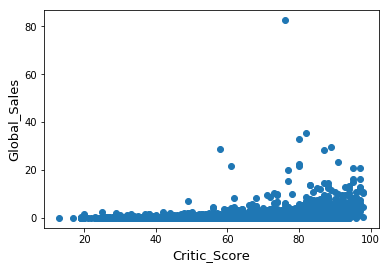

In [35]:
fig, ax = plt.subplots()
ax.scatter(x = data['Critic_Score'], y = data['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

There's really only one clear outlier in the dataset, so lets get rid of it

In [36]:
data = data.drop(data[(data['Critic_Score']>60) & (data['Global_Sales']>60)].index)

Let's check the plot again to confirm we are rid of the outlier

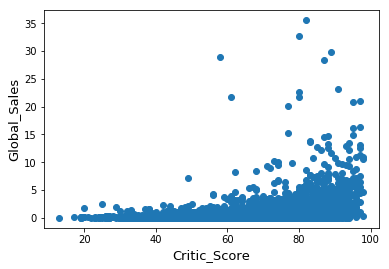

In [37]:
fig, ax = plt.subplots()
ax.scatter(x = data['Critic_Score'], y = data['Global_Sales'])
plt.ylabel('Global_Sales', fontsize=13)
plt.xlabel('Critic_Score', fontsize=13)
plt.show()

Here we get to the question of "what constitutes an outlier?". If we look at the plot post-outlier removal, it still looks as if though there are outliers in the data. However, removing too many data points that are seemingly outliers may cross over to data tampering, which we don't want to get into. So for now, lets keep the data as it is.

#### The Target Variable

Our dependent variable is Global_Sales, so lets explore it some more.

Let's look at its distribution

/home/bat/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.




 mu = 0.53 and sigma = 1.41



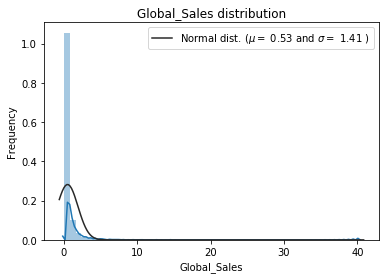

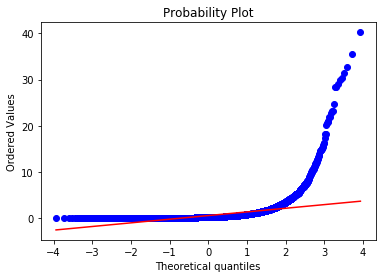

In [38]:
sns.distplot(data['Global_Sales'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(data['Global_Sales'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(data['Global_Sales'], plot=plt)
plt.show()

* As we can see, **Global_Sales** is nowhere normally distributed, which may be problematic for us down the line. However, as we have yet to further investigate the data, let's not do any transformations just yet. We'll look at doing a log-transformation down the line.



* Before we move on to splitting the data into training and test sets, lets look at some feature correlations, to ensure that our independent variables don't suffer from autocorrelation, which may be problematic in some linear models such as liner regression if we want to look at feature importance through the intercepts. Let's do this by plotting a correlation heatmap with Seaborn.

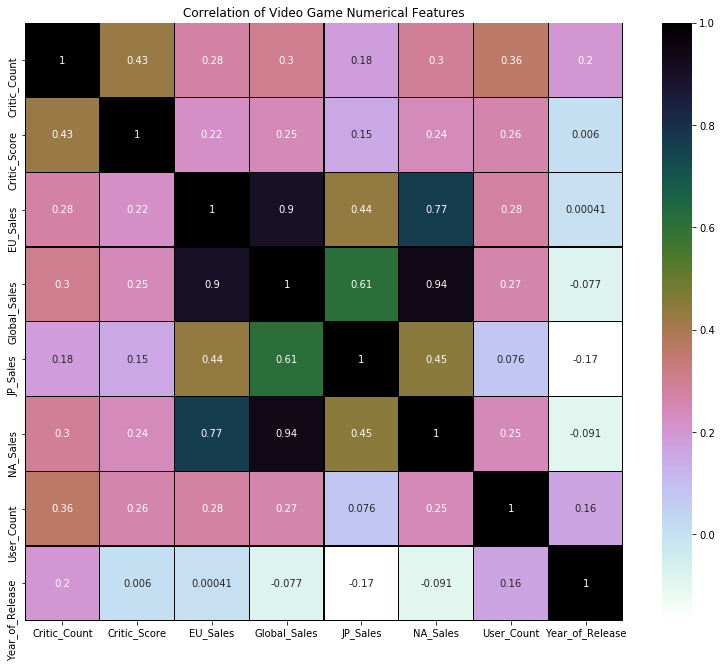

In [39]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in vgs.iteritems():
    if type(colvalue[2]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = vgs.columns.difference(str_list) 
# Create Dataframe containing only numerical features
data_num = vgs[num_list]
f, ax = plt.subplots(figsize=(14, 11))
plt.title('Correlation of Video Game Numerical Features')
# Draw the heatmap using seaborn
sns.heatmap(data_num.astype(float).corr(),linewidths=0.25,vmax=1.0, 
            square=True, cmap="cubehelix_r", linecolor='k', annot=True)
plt.show()

* In terms of autocorrelation the prospective independent variables aren't too highly correlated with each other in the correlation heat map. 


* Only sales numbers are highly correlated with each other. Therefore we can look at intercepts of regression models without too much worries if we wish to do so later on. 


* Higher correlations between sales figures may speak to the global nature of the video game industry: a success in one continent usually means a success in another continent as well. This lends greater confidence to using just Global_Sales as the dependent variable.

#### Feature Engineering

Let's look at what features have N/A values

In [40]:
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(15)

,Missing Ratio
User_Count,54.605814
Critic_Count,51.333892
Critic_Score,51.333892
Rating,40.489293
User_Score,40.100490
Developer,39.615983
Name,0.011963


* Here we have an issue. Critic_Score which may very well be the most important independent variable, has almost 50 % of its values as N/A. Similarly roughly 40 % of data points are missing for User_Score which is highly likely one of the most important independent variables. This ratio of missing data is so large, that it cannot feasibly be filled with median values for instance.


* Lets try a workaround. As previously mentioned, it may be more relevant to look at only current or previous generation consoles. So let's find out what all the consoles in the dataset are. Then lets choose a subset of those and this will likely automatically reduce the missing ratio of the independent variables as lesser known consoles and console games might not have Metacritic scores. Two birds with one stone.

In [41]:
print(pd.value_counts(data["Platform"]))

PS2     2161
DS      2152
PS3     1331
Wii     1319
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64


* As we can see, there are actually a lot of different platforms in the dataset. As previously mentioned, it might be most relevant to look at only current gen consoles in our model, however the issue here is that we will have a limited amount of data. 


* Therefore, let's widen our scope somewhat and look at the following platforms: PS3, PS4, X360, XOne, PC, Wii and WiiU. This ensures that we won't have too little data. Let's keep only relevant platforms.

In [42]:
data = data[(data['Platform'] == 'PS3') | (data['Platform'] == 'PS4') | (data['Platform'] == 'X360') | (data['Platform'] == 'XOne') | (data['Platform'] == 'Wii') | (data['Platform'] == 'WiiU') | (data['Platform'] == 'PC')]

#Let's double check the value counts to be sure
print(pd.value_counts(data["Platform"]))

#Let's see the shape of the data again
print(data.shape)

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

PS3     1331
Wii     1319
X360    1262
PC       974
PS4      393
XOne     247
WiiU     147
Name: Platform, dtype: int64
(5673, 15)


,Missing Ratio
Critic_Count,37.493390
Critic_Score,37.493390
User_Count,34.584876
Rating,23.761678
User_Score,22.563018
Developer,21.716905


So we still have almost 40 % of data points missing the critic score. This is still way too big, so let's drop all rows, that have N/A for Critic_Score. We cannot replace 40 % of the data with say, the median values. We must therefore eliminate N/A observations themselves.

In [43]:
data = data.dropna(subset=['Critic_Score'])

#Let's see the shape of the data again
print(data.shape)

#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

(3546, 15)


,Missing Ratio
User_Count,5.019741
Rating,2.002256
User_Score,0.564016
Developer,0.084602


* This looks better already. We've reached the point where we've dealt with N/A values for the most important variable and we still have enough data to work with. We still have to handle N/A values for the rest of the variables however, but this isn't as glaring of an issue as the missing ratios are relatively small, the highest being roughly 5 % for User_Count.


* Let's deal with the rest of the N/A values next.

####  For Publisher let's fill N/A's with the mode


In [44]:
data['Publisher'] = data['Publisher'].fillna(data['Publisher'].mode()[0])

#### For Developer let's fill N/A's with the mode

In [45]:
data['Developer'] = data['Developer'].fillna(data['Developer'].mode()[0])

#### For Rating let's fill N/A's with the mode

In [46]:
data['Rating'] = data['Rating'].fillna(data['Rating'].mode()[0])

#### For Year_of_Release let's fill with the median value

In [47]:
data['Year_of_Release'] = data['Year_of_Release'].fillna(data['Year_of_Release'].median())

#### For User_Score let's fill with the median value

In [48]:
#There's "tbd" values in the mix here which we need to handle first
data['User_Score'] = data['User_Score'].replace('tbd', None)

#Now we can handle the N/A's appropriately
data['User_Score'] = data['User_Score'].fillna(data['User_Score'].median())

#### For User_Count let's fill with the median value

In [49]:
data['User_Count'] = data['User_Count'].fillna(data['User_Count'].median())


#### Now let's verify that we don't have any more missing values

In [50]:
#Lets see the missing ratios again
data_na = (data.isnull().sum() / len(data)) * 100
data_na = data_na.drop(data_na[data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :data_na})
missing_data.head(16)

,Missing Ratio


We've dealt with all the missing values finally. Now let's deal with categorical values next. We need to change the following independent variables to dummy variables:

* Platform
* Genre
* Publisher
* Developer
* Rating


However, here we have an issue. Publisher and Developer will cause a massive influx of features as there are so many unique values in the mix. At this point it seems best to drop these features entirely.

Instead, let's only create dummies for:

* Platform
* Genre
* Rating

In [51]:
print(data.shape) #pre-dummies shape
data = pd.get_dummies(data=data, columns=['Platform', 'Genre', 'Rating'])
print(data.shape) #post-dummies shape
data.head() #Check to verify that dummies are ok

(3546, 15)
(3546, 36)


,Name,Year_of_Release,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,...,Genre_Role-Playing,Genre_Shooter,Genre_Simulation,Genre_Sports,Genre_Strategy,Rating_E,Rating_E10+,Rating_M,Rating_RP,Rating_T
2,Mario Kart Wii,2008,Nintendo,15.68,12.76,3.79,35.52,82.0,73.0,8.3,...,0,0,0,0,0,1,0,0,0,0
3,Wii Sports Resort,2009,Nintendo,15.61,10.93,3.28,32.77,80.0,73.0,8,...,0,0,0,1,0,1,0,0,0,0
7,Wii Play,2006,Nintendo,13.96,9.18,2.93,28.92,58.0,41.0,6.6,...,0,0,0,0,0,1,0,0,0,0
8,New Super Mario Bros. Wii,2009,Nintendo,14.44,6.94,4.70,28.32,87.0,80.0,8.4,...,0,0,0,0,0,1,0,0,0,0
13,Wii Fit,2007,Nintendo,8.92,8.03,3.60,22.70,80.0,63.0,7.7,...,0,0,0,1,0,1,0,0,0,0


Let's drop the features we wish to discard for our models. These include:

* Name
* Publisher
* Developer
* NA_Sales
* EU_Sales
* JP_Sales
* Other_Sales

In [52]:
data = data.drop(['Name', 'Publisher', 'Developer', 'NA_Sales', 'EU_Sales', 'JP_Sales'], axis=1)

Let's define X and Y and then split into training and test data

In [53]:
data.columns

Index(['Year_of_Release', 'Global_Sales', 'Critic_Score', 'Critic_Count',
       'User_Score', 'User_Count', 'Platform_PC', 'Platform_PS3',
       'Platform_PS4', 'Platform_Wii', 'Platform_WiiU', 'Platform_X360',
       'Platform_XOne', 'Genre_Action', 'Genre_Adventure', 'Genre_Fighting',
       'Genre_Misc', 'Genre_Platform', 'Genre_Puzzle', 'Genre_Racing',
       'Genre_Role-Playing', 'Genre_Shooter', 'Genre_Simulation',
       'Genre_Sports', 'Genre_Strategy', 'Rating_E', 'Rating_E10+', 'Rating_M',
       'Rating_RP', 'Rating_T'],
      dtype='object')

In [54]:
Y = data[['Global_Sales']]

X = data.drop(['Global_Sales'],axis =1)



#Double checking the shape
print(X.shape)
print(Y.shape)

(3546, 29)
(3546, 1)


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42)

#Let's check the shape of the split data as a precaution
print("X_train shape: {}".format(X_train.shape))
print("Y_train shape: {}".format(Y_train.shape))

print("X_test shape: {}".format(X_test.shape))
print("Y_test shape: {}".format(Y_test.shape))

X_train shape: (2659, 29)
Y_train shape: (2659, 1)
X_test shape: (887, 29)
Y_test shape: (887, 1)


* Now that we have the test split into training and test data we can still do some final scaling of the data before fitting the models.

* As mentioned previously, lets do a log-transformation of the dependent variable in both the training and test data.

In [56]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
Y_train = np.log1p(Y_train)
Y_test = np.log1p(Y_test)

/home/bat/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.




 mu = 0.43 and sigma = 0.48



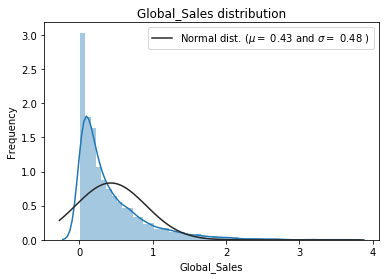

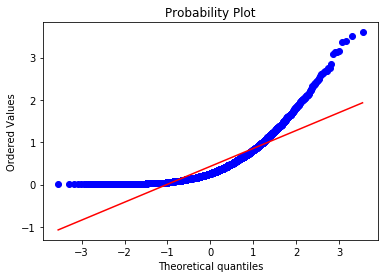

In [57]:
#Check the new distribution 
Y_log_transformed = np.log1p(data['Global_Sales']) #For comparison to earlier, here's the whole Y transformed
sns.distplot(Y_log_transformed , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(Y_log_transformed)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Global_Sales distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(Y_log_transformed, plot=plt)
plt.show()

* As we can see, the log-transformation didn't do too much to help us normalize the data. To be honest, this step might not be all that useful, especially if we choose to fit models that can handle non-linear data pretty well. None the less, not much harm done either, so let's proceed.

* Let's fit X_train and scale X_train and X_test with the MinMax Scaler to get all independent variables in a similar range.



In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [59]:
param_grid_gbr = [
    {'n_estimators': [200, 225, 250, 275], 'max_features': [6, 8, 10, 12], 'max_depth': [5, 7, 9]}
]

from sklearn.model_selection import GridSearchCV

In [60]:
from sklearn.ensemble import GradientBoostingRegressor

grid_search_gbr = GridSearchCV(GradientBoostingRegressor(), param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, Y_train)
print("Best parameters: {}".format(grid_search_gbr.best_params_))
gbr_best_cross_val_score = (np.sqrt(-grid_search_gbr.best_score_))
print("Best cross-validation score: {:.2f}".format(np.expm1(gbr_best_cross_val_score)))
gbr_score = np.sqrt(-grid_search_gbr.score(X_test, Y_test))
print("Test set score: {:.2f}".format(np.expm1(gbr_score)))

Best parameters: {'max_depth': 5, 'max_features': 6, 'n_estimators': 225}
Best cross-validation score: 0.32
Test set score: 0.33


So the best model out of the seven we trained is the GBR! Let's therefore take a loot at the feature importances of the model as well to find out which features are the most important ones in explaining the results.

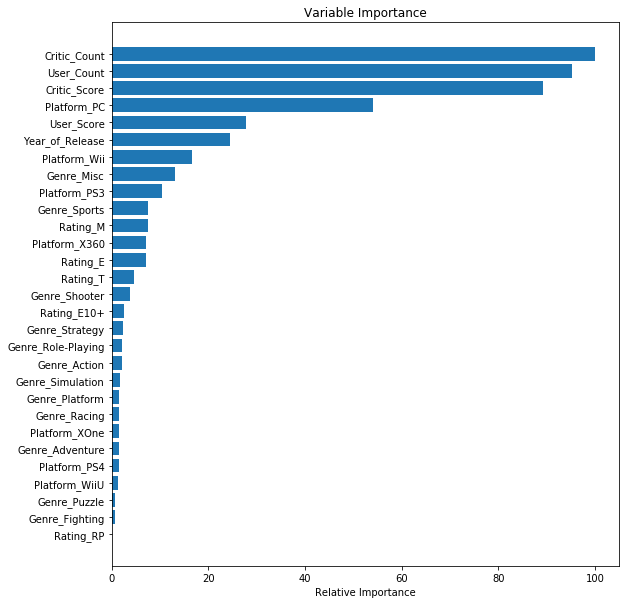

In [61]:
# Plot feature importance
feature_importance = grid_search_gbr.best_estimator_.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(20,10))
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X_train.columns.values[sorted_idx]) #Not 100 % sure the feature names match the importances correctly...
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# Result

* The best model Is Gradient Boosting Regressor.


* So the GBR's best cross-validation score and its test score are both 0.33 as measured in RMSE. This means that first off, the model generalizes well as the difference between the cross-validation score and the test set score is negligible. In more concrete terms however, it means that the average error the model makes in its predicitons amount to 330k units. That means that in making a forecast, on average the model will be wrong in forecasting video game sales by 330k units.


* Additionally, an interesting finding is that the amount of users and the amount of critics rating a game on Metacritic is more important in explaining the results than the scores themselves. My initial hypothesis would have been the other way around. In this regard, it seems that it doesn't necessarily matter as much that a game has a single esteemed critic scoring the game a 100, but rather that the game has lots of critics scoring it potentially even at a lower level to drive those unit sales.


* Another interesting finding is that the year of release is the fifth most important factor in explaingin the results. I would wager here that this is an indication of the fast growing video game industry: as the value for the year increases, unit sales increases mainly due to the market itself growing.


* In terms of platforms, the only ones that maintained some relevant measure of explanatory power was whether the game was released on PC and whether it was released on Wii. There may be many interpretations here, so it is best to be wary in interpreting this. A game being released on Wii might speak towards explaining lower unit sales due to the platform not being as popular as it's counter parts PS3 and Xbox 360. In the case of a game being released on PC, it is difficult to say which way this explanatory power goes, as PC is such a large platform with all kinds of games being released on it.


* If we would use this model to forecast the unit sales of a small video game developer's game, you would be better of using other methods. The reason is that typically independent smaller studios sell under a million copies. In this case, an error of 330k units is a lot and can have a tremendous financial impact on the company, if you are relying on forecasting sales with this model. 


* However, if you use this model to forecast the unit sales of larger AAA game developer's game, an error of 330k units, isn't that fatal. If you're forecasting the unit sales of a developer who typically sells say 3 million copies, then a roughly 10 % deviation is not fatal. Sure it isn't close to perfect, but these type of models typically aren't.


* This model could thus be used as an extra input in making those sales forecasts.

# EXTRA

In [62]:
def rm_outliers(df, list_of_keys):
    df_out = df
    for key in list_of_keys:
        # Calculate first and third quartile
        first_quartile = df_out[key].describe()["25%"]
        third_quartile = df_out[key].describe()["75%"]

        # Interquartile range
        iqr = third_quartile - first_quartile

        # Remove outliers
        removed = df_out[(df_out[key] <= (first_quartile - 3 * iqr)) |
                    (df_out[key] >= (third_quartile + 3 * iqr))] 
        df_out = df_out[(df_out[key] > (first_quartile - 3 * iqr)) &
                    (df_out[key] < (third_quartile + 3 * iqr))]
    return df_out, removed

In [63]:
data1, rmvd_global = rm_outliers(vgs, ["Global_Sales"])
data1.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,15661.000000,15661.000000,15661.000000,15661.000000,15661.000000,7432.000000,7432.000000,6867.000000
mean,2006.780410,0.144871,0.072520,0.046943,0.288936,67.761302,24.465689,111.447648
std,5.893531,0.210715,0.131171,0.130259,0.346530,13.635510,17.190641,406.312019
min,1980.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.060000,59.000000,11.000000,9.000000
50%,2008.000000,0.070000,0.020000,0.000000,0.150000,70.000000,20.000000,21.000000
75%,2011.000000,0.190000,0.080000,0.030000,0.380000,78.000000,34.000000,61.000000
max,2020.000000,1.670000,1.580000,1.650000,1.690000,98.000000,106.000000,10665.000000


In [64]:
data1.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
1058,Cabela's Big Game Hunter 2010,Wii,2009,Sports,Activision Value,1.58,0.0,0.0,1.69,NaN,NaN,7.8,4.0,Activision,T


In [65]:
data1["Has_Score"] = data1["User_Score"].notnull() & data1["Critic_Score"].notnull()
rmvd_global["Has_Score"] = rmvd_global["User_Score"].notnull() & rmvd_global["Critic_Score"].notnull()

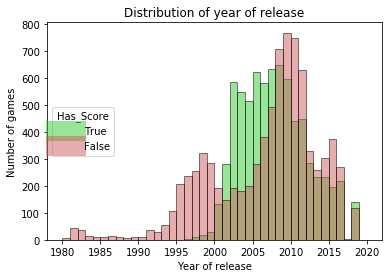

In [66]:
from matplotlib.lines import Line2D
plt.hist(data1[data1["Has_Score"]==True]["Year_of_Release"], color="limegreen", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.hist(data1[data1["Has_Score"]==False]["Year_of_Release"], color="indianred", alpha=0.5, 
         bins=range(1980, 2021), edgecolor="black")
plt.title("Distribution of year of release")
plt.xlabel("Year of release")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="limegreen", lw=20, label="True", alpha=0.5),
                    Line2D([0], [0], color="indianred", lw=20, label="False", alpha=0.5)],
           title="Has_Score", loc=6);
plt.show()

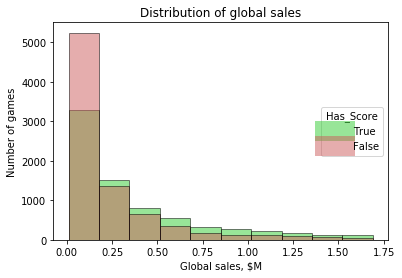

In [67]:
plt.hist(data1[data1["Has_Score"]==True]["Global_Sales"], color="limegreen", alpha=0.5, 
         edgecolor="black")
plt.hist(data1[data1["Has_Score"]==False]["Global_Sales"], color="indianred", alpha=0.5, 
         edgecolor="black")
plt.title("Distribution of global sales")
plt.xlabel("Global sales, $M")
plt.ylabel("Number of games")
plt.legend(handles=[Line2D([0], [0], color="limegreen", lw=20, label="True", alpha=0.5),
                    Line2D([0], [0], color="indianred", lw=20, label="False", alpha=0.5)],
           title="Has_Score", loc=7);
plt.show()

data["Country"] = data[["NA", "EU", "JP", "Other"]].idxmax(1, skipna=True)
palette = {True: "limegreen", False: "indianred"}
sns.factorplot(y="Country", hue="Has_Score", data=data, size=8, kind="count", palette=palette)
sns.factorplot(y="Country", x="Global", hue="Has_Score", data=data, size=8, kind="bar", palette=palette,
               estimator=lambda x: np.median(x));

In [69]:
scored = data1.dropna(subset=["User_Score", "Critic_Score", "Rating"])
scored.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,7324.000000,6251.000000
mean,2007.327826,0.195986,0.102845,0.025337,0.360244,67.765565,24.577826,118.994881
std,4.338376,0.222782,0.149133,0.088268,0.377483,13.640267,17.227077,423.959357
min,1985.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.050000,0.010000,0.000000,0.090000,59.000000,11.000000,10.000000
50%,2007.000000,0.110000,0.040000,0.000000,0.210000,70.000000,20.000000,23.000000
75%,2010.000000,0.260000,0.130000,0.000000,0.510000,78.000000,34.000000,66.000000
max,2018.000000,1.670000,1.580000,1.390000,1.690000,98.000000,106.000000,10665.000000


In [70]:
scored, rmvd_user_count = rm_outliers(scored, ["User_Count"])
scored.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000,5638.000000
mean,2007.257716,0.205695,0.098698,0.028703,0.369753,67.822277,24.956900,37.485811
std,4.237380,0.225221,0.138778,0.095149,0.367379,13.438418,15.727819,44.568979
min,1985.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2004.000000,0.060000,0.010000,0.000000,0.100000,60.000000,13.000000,9.000000
50%,2007.000000,0.130000,0.040000,0.000000,0.230000,70.000000,22.000000,20.000000
75%,2010.000000,0.280000,0.130000,0.000000,0.520000,78.000000,34.000000,45.750000
max,2018.000000,1.670000,1.160000,1.390000,1.690000,98.000000,91.000000,233.000000


In [85]:
scored.head(1)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,Has_Score
1059,SOCOM 3: U.S. Navy SEALs,PS2,2005,Shooter,Sony Computer Entertainment,1.22,0.34,0.04,1.69,82.0,59.0,8.8,64.0,Zipper Interactive,M,True


In [88]:
import category_encoders as ce
# Select the numeric columns

scored['User_Score'] = scored['User_Score'].astype('float64')
numeric_subset = scored[['Year_of_Release','Critic_Score','Critic_Count','User_Score','User_Count','Global_Sales']]

# Select the categorical column
categorical_subset = scored[["Platform", "Genre", "Rating"]]

# One hot encode
encoder = ce.one_hot.OneHotEncoder()
categorical_subset = encoder.fit_transform(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Find correlations with the score 
correlations = features.corr()["Global_Sales"].dropna().sort_values()

In [91]:
features.columns

Index(['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Global_Sales', 'Platform_1', 'Platform_2', 'Platform_3',
       'Platform_4', 'Platform_5', 'Platform_6', 'Platform_7', 'Platform_8',
       'Platform_9', 'Platform_10', 'Platform_11', 'Platform_12',
       'Platform_13', 'Platform_14', 'Platform_15', 'Platform_16',
       'Platform_17', 'Platform_-1', 'Genre_1', 'Genre_2', 'Genre_3',
       'Genre_4', 'Genre_5', 'Genre_6', 'Genre_7', 'Genre_8', 'Genre_9',
       'Genre_10', 'Genre_11', 'Genre_12', 'Genre_-1', 'Rating_1', 'Rating_2',
       'Rating_3', 'Rating_4', 'Rating_5', 'Rating_-1'],
      dtype='object')

In [92]:
correlations.head()

Platform_5    -0.186835
Genre_10      -0.094490
Genre_12      -0.083940
Platform_17   -0.069198
Platform_15   -0.061921
Name: Global_Sales, dtype: float64

In [93]:
features.shape

(5638, 43)

In [94]:
from sklearn.model_selection import train_test_split
basic_target = pd.Series(features["Global_Sales"])
basic_features = features.drop(columns="Global_Sales")
features_train, features_test, target_train, target_test = train_test_split(basic_features, basic_target,test_size=0.2,
                                                                            random_state=42)
           

In [95]:
print(features_train.shape)
print(features_test.shape)
print(target_train.shape)
print(target_test.shape)

(4510, 42)
(1128, 42)
(4510,)
(1128,)


In [96]:
def mae(y_true, y_pred):
    return np.average(abs(y_true - y_pred))

In [97]:
baseline_guess = np.median(target_train)
basic_baseline_mae = mae(target_test, baseline_guess)
print("Baseline guess for global sales is: {:.02f}".format(baseline_guess))
print("Baseline Performance on the test set: MAE = {:.04f}".format(basic_baseline_mae))

Baseline guess for global sales is: 0.23
Baseline Performance on the test set: MAE = 0.2794


In [98]:
features_train.columns

Index(['Year_of_Release', 'Critic_Score', 'Critic_Count', 'User_Score',
       'User_Count', 'Platform_1', 'Platform_2', 'Platform_3', 'Platform_4',
       'Platform_5', 'Platform_6', 'Platform_7', 'Platform_8', 'Platform_9',
       'Platform_10', 'Platform_11', 'Platform_12', 'Platform_13',
       'Platform_14', 'Platform_15', 'Platform_16', 'Platform_17',
       'Platform_-1', 'Genre_1', 'Genre_2', 'Genre_3', 'Genre_4', 'Genre_5',
       'Genre_6', 'Genre_7', 'Genre_8', 'Genre_9', 'Genre_10', 'Genre_11',
       'Genre_12', 'Genre_-1', 'Rating_1', 'Rating_2', 'Rating_3', 'Rating_4',
       'Rating_5', 'Rating_-1'],
      dtype='object')

In [99]:
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(features_train, target_train)
    
    # Make predictions and evalute
    model_pred = model.predict(features_test)
    model_mae = mae(target_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [101]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

In [102]:
lr = LinearRegression()
lr_mae = fit_and_evaluate(lr)

print("Linear Regression Performance on the test set: MAE = {:.04f}".format(lr_mae))

Linear Regression Performance on the test set: MAE = 0.2358


In [103]:
svm = SVR(C = 1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm)

print("Support Vector Machine Regression Performance on the test set: MAE = {:.04f}".format(svm_mae))

Support Vector Machine Regression Performance on the test set: MAE = 0.2879


In [104]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print("Random Forest Regression Performance on the test set: MAE = {:.04f}".format(random_forest_mae))

Random Forest Regression Performance on the test set: MAE = 0.2325


In [105]:
gradient_boosting = GradientBoostingRegressor(random_state=60)
gradient_boosting_mae = fit_and_evaluate(gradient_boosting)

print("Gradient Boosting Regression Performance on the test set: MAE = {:.04f}".format(gradient_boosting_mae))

Gradient Boosting Regression Performance on the test set: MAE = 0.2203


In [106]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print("K-Nearest Neighbors Regression Performance on the test set: MAE = {:.04f}".format(knn_mae))

K-Nearest Neighbors Regression Performance on the test set: MAE = 0.2603


In [107]:
ridge = Ridge(alpha=10)
ridge_mae = fit_and_evaluate(ridge)

print("Ridge Regression Performance on the test set: MAE = {:.04f}".format(ridge_mae))

Ridge Regression Performance on the test set: MAE = 0.2353


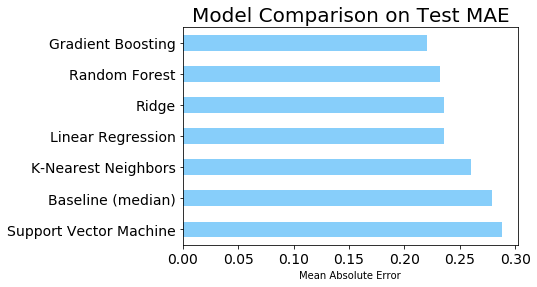

In [108]:
model_comparison = pd.DataFrame({"model": ["Linear Regression", "Support Vector Machine",
                                           "Random Forest", "Gradient Boosting",
                                            "K-Nearest Neighbors", "Baseline (median)", "Ridge"],
                                 "mae": [lr_mae, svm_mae, random_forest_mae, 
                                         gradient_boosting_mae, knn_mae, basic_baseline_mae, ridge_mae]})
model_comparison.sort_values("mae", ascending=False).plot(x="model", y="mae", kind="barh",
                                                           color="lightskyblue", legend=False)
plt.ylabel(""); plt.yticks(size=14); plt.xlabel("Mean Absolute Error"); plt.xticks(size=14)
plt.title("Model Comparison on Test MAE", size=20);

In [109]:
# Loss function to be optimized
loss = ["ls", "lad", "huber"]

# Maximum depth of each tree
max_depth = [2, 3, 5, 10, 15]

# Minimum number of samples per leaf
min_samples_leaf = [1, 2, 4, 6, 8]

# Minimum number of samples to split a node
min_samples_split = [2, 4, 6, 10]

# Maximum number of features to consider for making splits
max_features = ["auto", "sqrt", "log2", None]

hyperparameter_grid = {"loss": loss,
                       "max_depth": max_depth,
                       "min_samples_leaf": min_samples_leaf,
                       "min_samples_split": min_samples_split,
                       "max_features": max_features}

In [110]:
from sklearn.model_selection import RandomizedSearchCV
basic_model = GradientBoostingRegressor(random_state = 42)

random_cv = RandomizedSearchCV(estimator=basic_model,
                               param_distributions=hyperparameter_grid,
                               cv=4, n_iter=20, 
                               scoring="neg_mean_absolute_error",
                               n_jobs=-1, verbose=1, 
                               return_train_score=True,
                               random_state=42)

In [111]:
random_cv.fit(features_train, target_train)

Fitting 4 folds for each of 20 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  2.3min finished


RandomizedSearchCV(cv=4, error_score='raise-deprecating',
          estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_sampl...te=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'loss': ['ls', 'lad', 'huber'], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score=True, scoring='neg_mean_absolute_error',
          verbose=1)

In [112]:
random_results = pd.DataFrame(random_cv.cv_results_).sort_values("mean_test_score", ascending=False)
random_results.head(10)[["mean_test_score", "param_loss",
                         "param_max_depth", "param_min_samples_leaf", "param_min_samples_split",
                         "param_max_features"]]

,mean_test_score,param_loss,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_max_features
17,-0.201855,lad,15,2,4,log2
7,-0.202835,huber,5,6,6,auto
0,-0.203393,huber,15,8,6,log2
15,-0.209414,ls,5,4,6,auto
16,-0.209531,lad,3,1,10,log2
8,-0.210933,lad,2,4,10,auto
3,-0.214143,lad,2,8,10,sqrt
19,-0.214182,lad,2,1,10,sqrt
1,-0.215159,huber,2,2,4,None
18,-0.218188,huber,2,8,6,sqrt


In [113]:
random_cv.best_estimator_

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=15,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [114]:
from sklearn.model_selection import GridSearchCV
trees_grid = {"n_estimators": [50, 100, 150, 200, 250, 300]}

basic_model = random_cv.best_estimator_
grid_search = GridSearchCV(estimator=basic_model, param_grid=trees_grid, cv=4, 
                           scoring="neg_mean_absolute_error", verbose=1,
                           n_jobs=-1, return_train_score=True)

In [116]:
grid_search.fit(features_train, target_train);

Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.4min finished


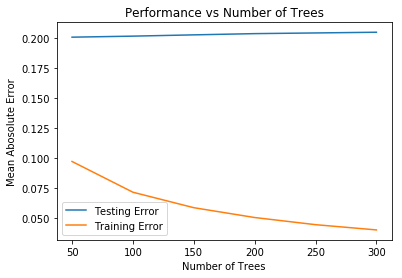

In [117]:
results = pd.DataFrame(grid_search.cv_results_)

plt.plot(results["param_n_estimators"], -1 * results["mean_test_score"], label = "Testing Error")
plt.plot(results["param_n_estimators"], -1 * results["mean_train_score"], label = "Training Error")
plt.xlabel("Number of Trees"); plt.ylabel("Mean Abosolute Error"); plt.legend();
plt.title("Performance vs Number of Trees");

In [118]:
basic_final_model = grid_search.best_estimator_
basic_final_model

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='lad', max_depth=15,
             max_features='log2', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=2, min_samples_split=4,
             min_weight_fraction_leaf=0.0, n_estimators=50,
             n_iter_no_change=None, presort='auto', random_state=42,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [119]:
basic_final_pred = basic_final_model.predict(features_test)
basic_final_mae = mae(target_test, basic_final_pred)
print("Final model performance on the test set: MAE = {:.04f}.".format(basic_final_mae))

Final model performance on the test set: MAE = 0.2103.


/home/bat/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



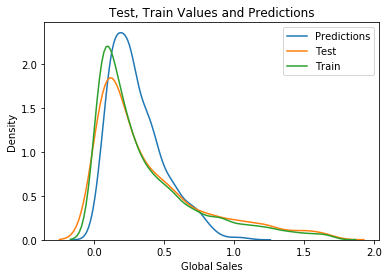

In [120]:
sns.kdeplot(basic_final_pred, label = "Predictions")
sns.kdeplot(target_test, label = "Test")
sns.kdeplot(target_train, label = "Train")

plt.xlabel("Global Sales"); plt.ylabel("Density");
plt.title("Test, Train Values and Predictions");

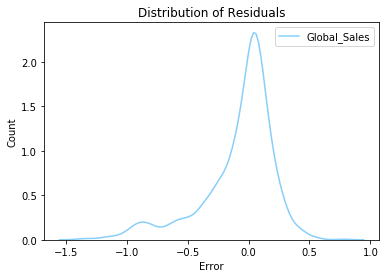

In [121]:
basic_residuals = basic_final_pred - target_test

sns.kdeplot(basic_residuals, color = "lightskyblue")
plt.xlabel("Error"); plt.ylabel("Count")
plt.title("Distribution of Residuals");